In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation

from tqdm import tqdm

$$ x_{n+1} = x_{n} - \gamma\nabla F(x_{n}) $$

$\gamma$ is the learning rate.

In [2]:
def f(x):
    return (x-1)**2

In [3]:
def Df(x,f,h):
    
    d = 0.
    if(h!=0):
        d = (f(x+h)-f(x-h))/(2*h)
    return d

In [4]:
h = 1e-3
x = np.linspace(-1,4,20)
F = f(x)
DF = Df(x,f,h)

<IPython.core.display.Javascript object>


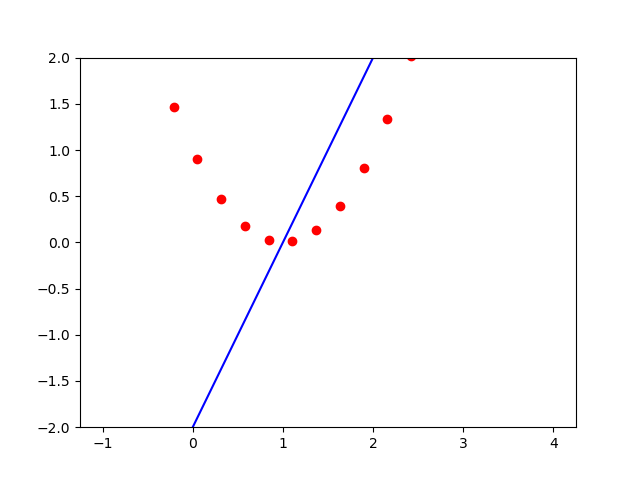

(-2, 2)

In [5]:
plt.plot(x,F,'ro')
plt.plot(x,Df(x,f,h),'b')
plt.ylim(-2,2)

In [6]:
gamma = 0.01

Epochs = 50
Steps = 50

Vector = np.zeros((Epochs,Steps))

for i in range(Epochs):
    
    # Ajusto la semilla 
    x0 = np.random.uniform(-10,10)
    
    for j in range(Steps):
        
        Vector[i,j] = x0
        
        x0 += -gamma*Df(x0,f,h)

In [7]:
print(Vector[:,-1])

[ 2.93002406 -2.97262873  2.02205442  2.60364335  0.56816253 -0.30996643
 -0.04819745  1.62442922  0.42470279  3.77005336 -0.78909101 -0.31792248
  0.44612623  0.59855938 -2.43974438  2.51254523  3.05486397  4.07066357
  0.06844624 -0.58156002 -1.38170202  2.13605263  2.66010485 -0.66775657
  3.03110265 -0.56167113  4.08247126  3.23609476  2.94328648  3.80124319
  0.83624818 -2.46508929  3.44325141  1.92894156 -1.77870499  0.85656908
 -1.1589875  -1.21206568  3.72681104  1.93970518  0.86162315  0.10680716
  0.42883042 -2.38428919  3.38307268  0.71776808 -1.58560873  1.7140415
 -0.140659   -1.67811122]


In [8]:
MinV = Vector[:,-1]

ii = np.argmin(f(Vector[:,-1]))

print(MinV[ii])

0.8616231535508936


# Hagamos el caso 2D

$$f(x,y) = x^{4} + y^{4} - 2(x-y)^{2}$$

In [9]:
def f2(x,y):
    return x**4 + y**4 - 2*(x-y)**2

In [10]:
x = np.linspace(-3,3,30)
y = np.linspace(-3,3,30)

<IPython.core.display.Javascript object>


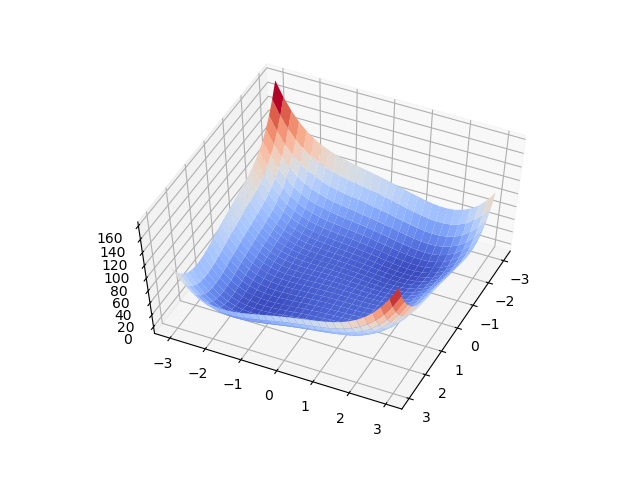

In [11]:
fig0 = plt.figure()
ax = fig0.add_subplot(1,1,1, projection = '3d',elev = 57, azim = 25)

X, Y = np.meshgrid(x,y)
Z = f2(X,Y)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

In [12]:
# Definamos el gradiente

def Dfx(x,y,f,h):
    d=0
    if(h!=0):
        d = (f(x+h,y)-f(x-h,y))/(2*h)
    return d

def Dfy(x,y,f,h):
    d=0
    if(h!=0):
        d = (f(x,y+h)-f(x,y-h))/(2*h)
    return d

In [13]:
gamma = 0.01

Epochs = 4
Steps = 100
limites = 3

VectorFinal = []


for i in range(Epochs):
    
    x0 = np.random.uniform(-limites,limites)
    y0 = np.random.uniform(-limites,limites)
    
    PointsX = []
    PointsY = []
    
    for j in range(Steps):
        
        PointsX.append(x0)
        PointsY.append(y0)
        
        x0 += -gamma*Dfx(x0,y0,f2,h)
        y0 += -gamma*Dfy(x0,y0,f2,h)
        
    VectorFinal.append([PointsX,PointsY])

In [14]:
UltimoX = np.zeros((Epochs))
UltimoY = np.zeros((Epochs))

for i in range(Epochs):
    
    UltimoX[i] = VectorFinal[i][0][-1]
    UltimoY[i] = VectorFinal[i][1][-1]

In [15]:
print(UltimoX)
print(UltimoY)

[ 0.97862762  1.41421322 -1.37314908  1.41419982]
[-0.60789274 -1.41421321  1.36520581 -1.4142009 ]


In [16]:
Minimos = np.zeros((Epochs))

for i in range(Epochs):
    Minimos[i] = f2(UltimoX[i],UltimoY[i])

In [17]:
print(Minimos)

[-3.98032634 -8.         -7.96821834 -8.        ]


In [18]:
ii = np.argmin(Minimos)
print(VectorFinal[ii][0][-1],VectorFinal[ii][1][-1])

(1.4142132154399008, -1.4142132148755735)


In [19]:
MejorEpoca = int(ii)

<IPython.core.display.Javascript object>


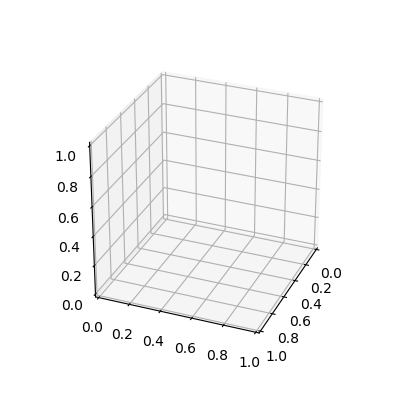

In [20]:
Nframes = len(VectorFinal[0][0])

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 29, azim = 22)

x1 = np.linspace(-3,3,30)
y1 = np.linspace(-3,3,30)
X1,Y1 = np.meshgrid(x1,y1)
Z1 = f2(X1,Y1)


def init():
    
    ax.set_xlim3d(-3.,3.)
    ax.set_ylim3d(-3.,3.)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

def animate(i,e):
    
    plot = ax.clear()
    init()
    
    x = VectorFinal[e][0]
    y = VectorFinal[e][1]
    
    plot = ax.plot_surface(X1,Y1,Z, cmap=cm.coolwarm, alpha=0.4)
    plot = ax.scatter(x[i],y[i],f2(x[i],y[i]),marker='o',color='r')
    
    return plot

e = MejorEpoca
Animation = animation.FuncAnimation(fig, animate, frames=Nframes, fargs=(e,),init_func=init)

<IPython.core.display.Javascript object>


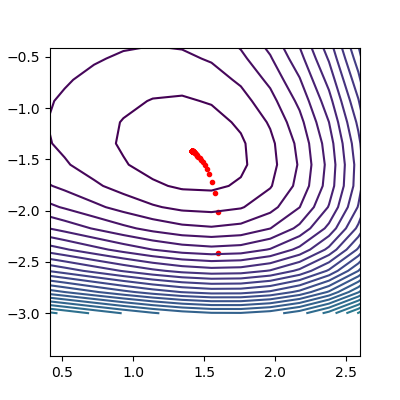

In [21]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

x1 = np.linspace(-3,3,30)
y1 = np.linspace(-3,3,30)
X1,Y1 = np.meshgrid(x1,y1)
Z1 = f2(X1,Y1)

e = MejorEpoca

x = VectorFinal[e][0]
y = VectorFinal[e][1]

xmin = np.min(x)
xmax = np.max(x)

ymin = np.min(y)
ymax = np.max(y)

tole = 1.0

ax.contour(X1, Y1, Z1,60)
ax.scatter(x,y,marker='.',color='r')
ax.set_xlim(xmin-tole,xmax+tole)
ax.set_ylim(ymin-tole,ymax+tole)


plt.show()

# Vamos a crear una Neurona y la vamos a entrenar para que funcione como una compuerta tipo And

# Activacion de la neurona
$$ f(z) = \frac{1}{1+e^{-z}}$$

$$ \vec{a}^{L} = f(z) = f( \vec{b} + \vec{W}\cdot \vec{X}  ) $$

$$ C = \frac{1}{2}(a^{L}-y_{i})^{2} $$

$$ \frac{\partial C}{\partial w} = \frac{\partial C}{\partial a} \frac{\partial a}{\partial z}\frac{\partial z}{\partial w} = (a-y_{i})\frac{\partial a}{\partial z} x_{i} $$

$$ \frac{\partial C}{\partial b} = \frac{\partial C}{\partial a} \frac{\partial a}{\partial z}\frac{\partial z}{\partial b} = (a-y_{i})\frac{\partial a}{\partial z} $$

In [22]:
sigm = lambda x: 1/(1+np.exp(-x))
dsigm = lambda x: x*(1-x)

In [23]:
class Neuron():
    
    def __init__(self, NConnections, NNeurons, ActivationFunc, DActivation):
        
        self.ActivationFunc = ActivationFunc
        
        self.DActivationFunc = DActivation
        
        # Inicializamos pesos y bias
        
        self.b = np.random.rand(1,NNeurons)*2-1
        self.W = np.random.rand(NConnections,NNeurons)*2 -1.
        
    def SetWeights(self):
        
        self.b = np.random.rand(1,self.Neurons)*2 - 1.
        self.W = np.random.rand(self.Connections,self.Neurons)*2-1.
        
    def Predict(self, Input, train = False):
        
        output = []
        
        z = self.b + np.dot(Input,self.W)
        a = self.ActivationFunc(z)
        
        output.append((z,a))
        
        if train:
            return output
        
        else:
            return output[0]
        
    def Train(self, XTrain, YTrain, lr = 0.5):
        
        out = self.Predict(XTrain, train=True)
        
        z = out[0][0]
        a = out[0][1]
        
        delta = (a-YTrain)*self.DActivationFunc(a[0][0])
        
        
        # Descenso del Gradiente
        self.b -= lr*delta[0]
        
        self.W[0] -= lr*delta[0]*XTrain[0]
        self.W[1] -= lr*delta[0]*XTrain[1]
        
        
        # Funcion a minimizar
        return 0.5*(a-YTrain)**2

In [24]:
# Vamos a crear una neurona

N0 = Neuron(2,1,sigm,dsigm)

In [25]:
print(N0.b)
print(N0.W)

[[-0.57089547]]
[[-0.43758178]
 [ 0.52004418]]


In [26]:
# Crear Data

XTrain = np.array([[1,1],[1,0],[0,1],[0,0]])
YTrain = np.array([[1.],[0.],[0.],[0]])

Ndata = len(XTrain)

print(N0.Predict(XTrain[0])[0])

[[-0.48843307]]


In [27]:
Cost = []

# Entrenamos

In [32]:
for e in tqdm(range(20000)):
    
    CostI = []
    
    for i in range(Ndata):
        
        out = N0.Train(XTrain[i],YTrain[i])
        CostI.append(out[0])
        
    Cost.append(np.average(CostI))
    
    if(Cost[-1] < 0.001):
        print('Entrenamiento Finalizado')
        break

 11%|█         | 2151/20000 [00:00<00:06, 2807.36it/s]

Entrenamiento Finalizado


<IPython.core.display.Javascript object>


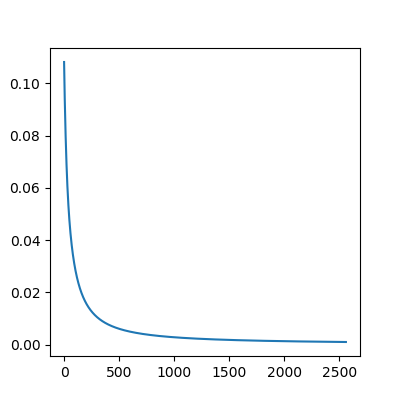

In [33]:
fig2 = plt.figure(figsize=(4,4))
#plt.yscale('log')
plt.plot(Cost)

# Verificando la salida

In [34]:
out = N0.Predict(XTrain)
print(out[1])

[[9.42445291e-01]
 [4.82439876e-02]
 [4.83079036e-02]
 [1.57107087e-04]]


In [35]:
for i in out[1]:
    print(round(i,1))

0.9
0.0
0.0
0.0
